# Z-оценка

In [1]:
import pandas as pd
import scipy.stats

In [2]:
eng = pd.read_csv('eng_test.csv')
eng.head()

,Id;Exam;Score;Advanced
0,ID1;TOEFL;77;NO
1,ID10;TOEFL;105;NO
2,ID100;TOEFL;107;YES
3,ID101;TOEFL;72;NO
4,ID102;TOEFL;120;YES


In [4]:
eng = pd.read_csv('eng_test.csv', sep=';')
eng.head()

,Id,Exam,Score,Advanced
0,ID1,TOEFL,77.0,NO
1,ID10,TOEFL,105.0,NO
2,ID100,TOEFL,107.0,YES
3,ID101,TOEFL,72.0,NO
4,ID102,TOEFL,120.0,YES


<AxesSubplot:>

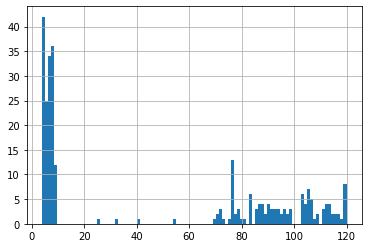

In [6]:
eng['Score'].hist(bins=100)

In [7]:
toefl = eng[eng['Exam'] == 'TOEFL']
toefl.describe()

,Score
count,125.000000
mean,93.776000
std,17.903804
min,25.000000
25%,81.000000
50%,94.000000
75%,107.000000
max,120.000000


<AxesSubplot:>

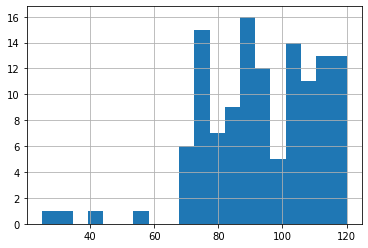

In [10]:
toefl['Score'].hist(bins=20)

In [11]:
ielts = eng[eng['Exam'] == 'IELTS']
ielts.describe()

,Score
count,149.000000
mean,6.432886
std,1.571126
min,4.000000
25%,5.000000
50%,6.500000
75%,8.000000
max,9.000000


<AxesSubplot:>

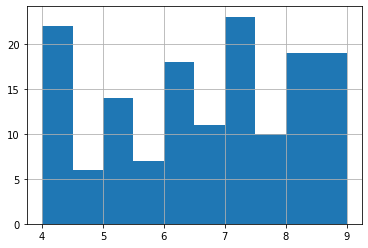

In [12]:
ielts['Score'].hist()

In [13]:
X = toefl['Score'][0] # извлекаем X — считаем z-оценку для первого студента
M = toefl['Score'].mean()
sigma = toefl['Score'].std(ddof=0)
print(X, M, sigma)
z_score = (X - M) / sigma
print(z_score)

77.0 93.776 17.83204486311091
-0.9407782522297513


In [14]:
z_new = 1.4706109
X_new = M + z_new * sigma
print(z_new, X_new, round(X_new))

1.4706109 119.99999954497991 120


In [15]:
scipy.stats.zscore(toefl['Score'])

array([-0.94077825,  0.62942865,  0.74158629, -1.22117234,  1.47061093,
       -0.54822653,  0.62942865, -0.04351716, -0.7725418 ,  0.06864047,
        1.41453211,  0.12471929,  0.12471929,  1.47061093,  1.13413802,
       -0.82862062,  0.01256166, -0.88469943,  0.96590156,  0.62942865,
       -0.37999007, -2.9596157 ,  1.13413802, -1.27725116,  0.51727102,
       -3.46432507,  1.30237447, -3.85687679,  0.18079811, -0.21175362,
       -0.60430534, -0.04351716,  0.68550747, -1.27725116,  0.85374393,
       -1.05293589,  0.57334984,  0.12471929, -1.16509352,  0.51727102,
       -0.32391125, -0.21175362,  0.85374393,  0.06864047, -0.04351716,
       -0.71646298,  0.57334984,  0.29295575,  0.29295575, -0.88469943,
        0.51727102,  1.47061093,  0.74158629,  0.51727102,  1.47061093,
       -0.43606889, -0.60430534, -0.43606889, -0.60430534,  0.74158629,
        0.51727102, -0.99685707, -0.09959598, -0.94077825,  0.96590156,
        0.74158629, -0.99685707,  1.13413802,  0.01256166,  1.07

In [ ]:
toefl['z-score'] = scipy.stats.zscore(toefl['Score'])

In [ ]:
ielts['z-score'] = scipy.stats.zscore(ielts['Score'])

In [ ]:
eng = pd.concat([toefl, ielts])

In [ ]:
eng['z-score'].hist()

In [ ]:
eng[eng['z-score'] < -3]

In [ ]:
eng.groupby('Advanced')['z-score'].mean()